In [6]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [7]:
# load sheet Transactions in file KPMG and print head
transactions = pd.read_excel("KPMG.xlsx", sheet_name ="Transactions")
print(transactions.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [8]:
# print info
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# describe default
print(transactions.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [24]:
# describe objects
transactions.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [11]:
#describe all
print(transactions.describe(include ='all'))

        transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-02-14 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   

C:\Users\User\AppData\Local\Temp/ipykernel_13208/1964731296.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transactions.describe(include ='all'))


In [12]:
# count null in each column
count_null = transactions.isna().sum()
print(count_null)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


# 1. Data Correction

## 1.1 Drop NA

In [13]:
# drop all null values in the table, print info, save as df_dropna_all
df_dropna_all = transactions.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [14]:
# create df_dropna_online_order by dropping null values in online_order column and print info 
dropna_online_order = transactions['online_order'].dropna()
df_dropna_online_order = dropna_online_order.to_frame()
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  19640 non-null  float64
dtypes: float64(1)
memory usage: 306.9 KB
None


## 1.2 Fill NA

In [15]:
#  fill all NA with 0, create df_fillna_0 table and print info
df_fillna_0 = transactions.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [16]:
df_fillna_ffill =transactions.ffill()
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [17]:
# fill NA with bfill, save as df_fillna_bfill and print info
df_fillna_bfill = transactions.bfill()
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorial Data

In [18]:
# load sheet Demographic and print top head
demographic = pd.read_excel("KPMG.xlsx", sheet_name ="CustomerDemographic")
print(demographic.head(1))

   customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator default owns_car  \
0                Health  Mass Customer                  N      "'      Yes   

   tenure  
0    11.0  


C:\Users\User\AppData\Local\Temp/ipykernel_13208/2549877813.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  demographic = pd.read_excel("KPMG.xlsx", sheet_name ="CustomerDemographic")


In [19]:
# print info
print(demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [20]:
# describe objects
print(demographic.describe())

       customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000


In [21]:
# Remove all NA row
print(demographic.dropna())

      customer_id first_name  last_name  gender  \
0               1    Laraine  Medendorp       F   
1               2        Eli    Bockman    Male   
2               3      Arlin     Dearle    Male   
8               9       Mala       Lind  Female   
9              10   Fiorenze    Birdall  Female   
...           ...        ...        ...     ...   
3992         3993       Andi    Dumelow  Female   
3993         3994    Stephie      Byars  Female   
3994         3995      Rusty     Iapico    Male   
3995         3996    Rosalia   Halgarth  Female   
3996         3997     Blanch     Nisuis  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      61 1954-01-20   
8                                      97 1973-03-10   
9                                      49 1988-10-11   
...                                   ...        ..

In [22]:
# print unique values of gender column
gender_unique = list(set(demographic['gender']))
print(gender_unique)

['Female', 'U', 'M', 'Femal', 'Male', 'F']


In [25]:
# categorize gender column into Male, Female, Unisex groups. Print new unique values
unique_value = demographic['gender'].replace({"F": "Female", "Femal": "Female", "M":"Male", "U":"Unisex"})
print(unique_value)


0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
3995    Female
3996    Female
3997    Unisex
3998      Male
3999      Male
Name: gender, Length: 4000, dtype: object


In [19]:
# calculate each customer's age, save as "Age" column, print min age, max age

from datetime import datetime
import numpy as np
customer_age =[]
for i in np.arange(len(demographic)):
    current_time = datetime.today()
    birthday = demographic.iloc[i]['DOB']
    age = current_time.year - birthday.year-((current_time.month, current_time.day)<(birthday.month, birthday.day))
    customer_age.append(age)

demographic['age'] = customer_age
print(demographic['age'].min())
print(demographic['age'].max())

20.0
178.0


In [20]:
# categorize customers under 35 years old as "Young", 36-55 as "Middle", over 55 as "Older", save as "Age_Group" column

demographic['Age_Group'] = pd.cut(x=demographic['age'], bins = [0,35,55,100], labels =['Young','Middle','Older'])
print(demographic[['age','Age_Group']])


       age Age_Group
0     68.0     Older
1     41.0    Middle
2     68.0     Older
3     60.0     Older
4     45.0    Middle
...    ...       ...
3995  46.0    Middle
3996  20.0     Young
3997   NaN       NaN
3998  48.0    Middle
3999  30.0     Young

[4000 rows x 2 columns]


# 2. Data Completeness

In [21]:
#join sale with demographic and print missing values in demographic 
sale_demo = transactions.merge(demographic, how ="left", on="customer_id")
print(sale_demo[sale_demo['first_name'].isna()])

       transaction_id  product_id  customer_id transaction_date  online_order  \
8707             8708           0         5034       2017-10-07           0.0   
16700           16701           0         5034       2017-01-27           0.0   
17468           17469           0         5034       2017-01-03           0.0   

      order_status           brand product_line product_class product_size  \
8707      Approved           Solex         Road        medium       medium   
16700     Approved  Norco Bicycles     Standard        medium       medium   
17468     Approved      OHM Cycles         Road        medium       medium   

       ...  DOB  job_title  job_industry_category wealth_segment  \
8707   ...  NaT        NaN                    NaN            NaN   
16700  ...  NaT        NaN                    NaN            NaN   
17468  ...  NaT        NaN                    NaN            NaN   

      deceased_indicator default  owns_car tenure age Age_Group  
8707                 Na

# 3. Data Aggregation

In [22]:
# calculate total number of customers
total_customers = demographic['customer_id'].nunique(dropna=True)
print(total_customers)

4000


In [23]:
# calculate number of customers each month
transaction_date = transactions['transaction_date']
transactions['year_month'] = transaction_date.dt.strftime('%B %Y')
monthly_customer = transactions['customer_id'].groupby(transactions['year_month']).nunique(dropna=True)
print(monthly_customer)

year_month
April 2017        1310
August 2017       1372
December 2017     1322
February 2017     1286
January 2017      1354
July 2017         1354
June 2017         1266
March 2017        1317
May 2017          1310
November 2017     1319
October 2017      1414
September 2017    1263
Name: customer_id, dtype: int64


In [24]:
# calculate monthly gross margin. Gross margin = list_price - standard_cost
gross_margin = transactions['list_price'] - transactions['standard_cost']
# print(gross_margin)
monthly_gm = gross_margin.groupby(transactions['year_month']).agg(sum)
print(monthly_gm)

year_month
April 2017        904691.310000
August 2017       970452.520000
December 2017     891454.070000
February 2017     870819.060000
January 2017      929487.739988
July 2017         938619.290000
June 2017         859571.550000
March 2017        879243.400000
May 2017          913742.610000
November 2017     924938.460000
October 2017      984973.464984
September 2017    862290.490000
dtype: float64


In [25]:
 # calculate number of orders and revenue, group by online_order and order_status

order_quantity = transactions['online_order'].groupby(transactions['order_status']).count()
print(order_quantity)
revenue = transactions['list_price'][transactions['order_status']=='Approved'].sum()
print("Total revenue:",revenue)
    
    

order_status
Approved     19467
Cancelled      173
Name: online_order, dtype: int64
Total revenue: 21954196.689999998


# 4. Data Visualization

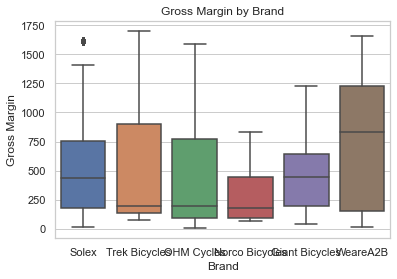

In [120]:
# create 5 different types of chart using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

gross_margin = transactions['list_price'] - transactions['standard_cost']

p = sns.boxplot(x = transactions['brand'], y = gross_margin,)
p.set_xlabel("Brand")
p.set_ylabel("Gross Margin")
p.set_title("Gross Margin by Brand")
plt.show()

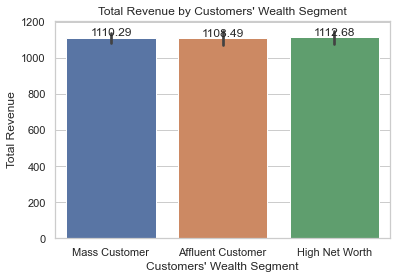

In [45]:
p = sns.barplot(x=demographic['wealth_segment'], y=transactions['list_price'])
p.set_xlabel("Customers' Wealth Segment")
p.set_ylabel("Total Revenue")
p.set_title("Total Revenue by Customers' Wealth Segment")
p.bar_label(p.containers[0])
plt.show()

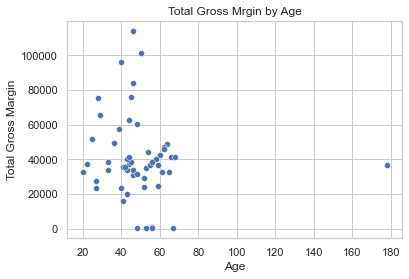

In [52]:
total_gm = gross_margin.groupby(demographic['age']).sum()
sns.set_theme(style="whitegrid")
s = sns.scatterplot(x=demographic['age'], y=total_gm)
s.set_xlabel("Age")
s.set_ylabel("Total Gross Margin")
s.set_title("Total Gross Mrgin by Age")
plt.show()

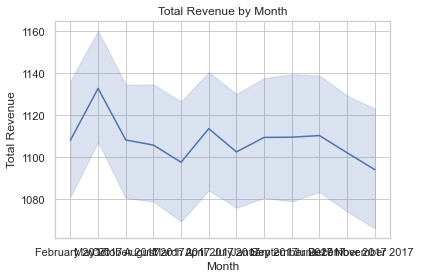

In [53]:
l = sns.lineplot(y=transactions['list_price'], x=transactions['year_month'])
l.set_xlabel("Month")
l.set_ylabel("Total Revenue")
l.set_title("Total Revenue by Month")
plt.show()

product_size
large      3900
medium    12767
small      2778
Name: online_order, dtype: int64


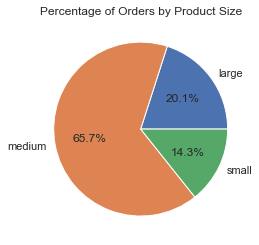

In [112]:
order = transactions['online_order'].groupby(transactions['product_size']).count()
print(order)
pie =plt.pie(order, labels=order.index, autopct='%.1f%%')
plt.title("Percentage of Orders by Product Size")
plt.show()